In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

yf.pdr_override()

y_symbols = ['^GSPC', '^MXX', '^FCHI','^NYA','^JKSE', '^RUT','^KS11' ]
#y_symbols = ['AAPL', 'MSFT', 'KO', 'PEP', 'GE', 'GM', 'F' ]

start_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2020,1,2)


In [2]:
def convert_to_USD(index_data, currency):
    # get historical conversion rate to USD
    tckr = yf.Ticker(currency+"USD=X")
    df = tckr.history(start=start_date, end=end_date)
    # fixing stupid error in the data
    if currency=="IDR":
        df.loc["2010-11-01"]=df.loc["2010-11-02"]
    currency_data = df.resample('BMS').first()
    
    # convert the data
    for item in index_data.items():
        closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
        #print(item[0])
        #print("closest date: " + str(closest_date))
        #print("before: " + str(item[1]))
        exchange_rate = currency_data.loc[closest_date]["Open"]
        #print("exchange_rate: " + str(exchange_rate))
        index_data[item[0]] = item[1]*exchange_rate
        #print("after: " + str(index_data[item[0]]))
        #print("________________________________")
    
    return index_data

In [3]:
data = pdr.get_data_yahoo(y_symbols, start=start_date, end=end_date, interval='1mo')['Adj Close']

data["^FCHI"] = convert_to_USD(data["^FCHI"], "EUR")
data["^MXX"] = convert_to_USD(data["^MXX"], "MXN")
data["^JKSE"] = convert_to_USD(data["^JKSE"], "IDR")
data["^KS11"] = convert_to_USD(data["^KS11"], "KRW")


[*********************100%***********************]  7 of 7 completed


/tmp/ipykernel_40345/3324130515.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
/tmp/ipykernel_40345/3324130515.py:12: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
/tmp/ipykernel_40345/3324130515.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
/tmp/ipykernel_40345/3324130515.py:12: FutureWarning: Passing method to DatetimeInde

In [4]:
# 10 years sliding window
sliding_windows_data = {}

for j in range(11):
    i=12*j
    returns = (data / data.shift(1))[1+i:12*10+i]
    logReturn = np.log(returns)
    #var(aX) = a^2var(X), cov(aX, aX) = a^2 cov(X,X)
    print(logReturn)
    yearly_mean = 12 * logReturn.mean()
    yearly_var = 12 * logReturn.var()
    yearly_std = np.sqrt(yearly_var)
    yearly_cov = 12 * logReturn.cov()

    dates = (data.index[i], data.index[12*10+i])

    sliding_windows_data[str(j+1) +'_yearly_mean'] = yearly_mean
    sliding_windows_data[str(j+1) +'_yearly_var'] = yearly_var
    sliding_windows_data[str(j+1) +'_yearly_std'] = yearly_std
    sliding_windows_data[str(j+1) +'_yearly_cov'] = yearly_cov
    sliding_windows_data[str(j+1) +'_dates'] = dates
    
    

               ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA  \
Date                                                                     
2000-02-01  0.089700 -0.020313 -0.098735 -0.130527  0.112325 -0.047919   
2000-03-01  0.015243  0.092324  0.011612  0.038553  0.014109  0.088840   
2000-04-01  0.021042 -0.031280 -0.101959 -0.171315 -0.118116 -0.005482   
2000-05-01  0.001018 -0.022159 -0.147884  0.008907 -0.107953 -0.000870   
2000-06-01  0.003151  0.023652  0.125563  0.115174  0.153240 -0.001041   
...              ...       ...       ...       ...       ...       ...   
2009-08-01  0.090857  0.033009  0.059533  0.069672  0.037463  0.033515   
2009-09-01  0.024293  0.035100  0.006958  0.022326  0.027216  0.039497   
2009-10-01 -0.028262 -0.019960 -0.000892  0.016947 -0.032213 -0.025119   
2009-11-01  0.031412  0.055779  0.029944 -0.021167  0.097227  0.051040   
2009-12-01  0.088979  0.017615  0.075776  0.081677  0.061902  0.012972   

                ^RUT  
Date          

In [5]:
#expected yearly returns:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_mean'])
    print("____________________________________________________________")

SLIDING WINDOW  1
^FCHI   -0.014171
^GSPC   -0.022544
^JKSE    0.131009
^KS11    0.061436
^MXX     0.145157
^NYA     0.008961
^RUT     0.023328
dtype: float64
____________________________________________________________
SLIDING WINDOW  2
^FCHI   -0.038160
^GSPC   -0.008335
^JKSE    0.218437
^KS11    0.124104
^MXX     0.168452
^NYA     0.012764
^RUT     0.043645
dtype: float64
____________________________________________________________
SLIDING WINDOW  3
^FCHI   -0.023635
^GSPC    0.010771
^JKSE    0.205159
^KS11    0.094875
^MXX     0.149197
^NYA     0.020247
^RUT     0.043126
dtype: float64
____________________________________________________________
SLIDING WINDOW  4
^FCHI    0.029403
^GSPC    0.051513
^JKSE    0.211405
^KS11    0.135330
^MXX     0.186215
^NYA     0.055520
^RUT     0.083205
dtype: float64
____________________________________________________________
SLIDING WINDOW  5
^FCHI    0.024433
^GSPC    0.049521
^JKSE    0.142523
^KS11    0.099046
^MXX     0.136537
^NYA     0.0

In [6]:
#cov_matrices:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_cov'])
    print("____________________________________________________________")

SLIDING WINDOW  1
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.049806  0.030266  0.026973  0.043901  0.037011  0.029514  0.037037
^GSPC  0.030266  0.026898  0.020098  0.032241  0.030335  0.026041  0.029215
^JKSE  0.026973  0.020098  0.095920  0.057075  0.043570  0.023511  0.029088
^KS11  0.043901  0.032241  0.057075  0.096574  0.048179  0.031714  0.038048
^MXX   0.037011  0.030335  0.043570  0.048179  0.060982  0.029814  0.043266
^NYA   0.029514  0.026041  0.023511  0.031714  0.029814  0.027178  0.028480
^RUT   0.037037  0.029215  0.029088  0.038048  0.043266  0.028480  0.048064
____________________________________________________________
SLIDING WINDOW  2
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.053186  0.032035  0.030609  0.047606  0.038069  0.032161  0.037629
^GSPC  0.032035  0.027883  0.021728  0.031207  0.029539  0.027829  0.032200
^JKSE  0.030609  0.021728  0.089497  0.049644  0.039543  0.026348  

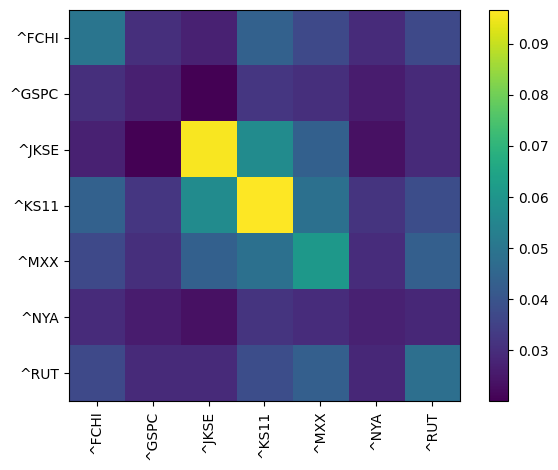

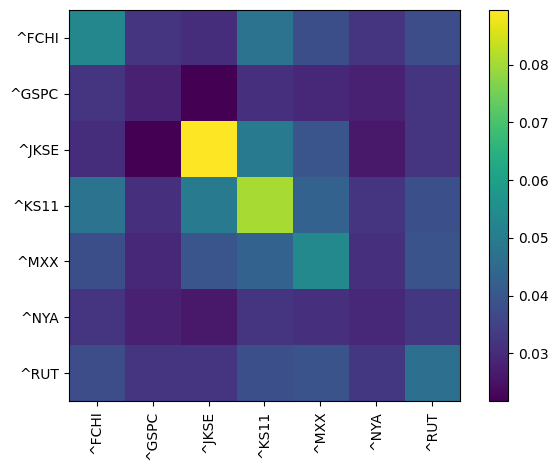

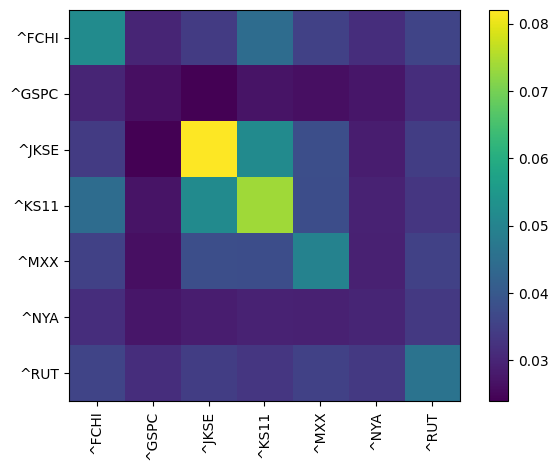

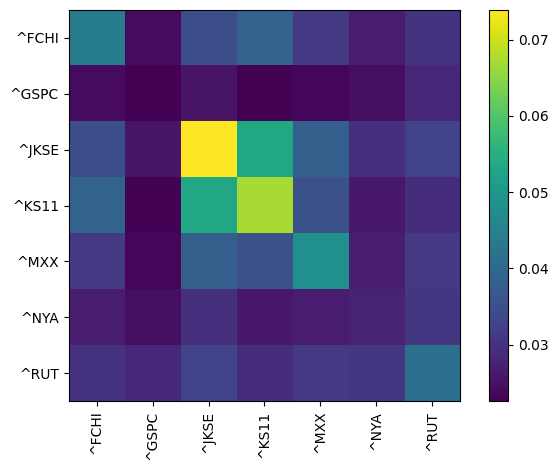

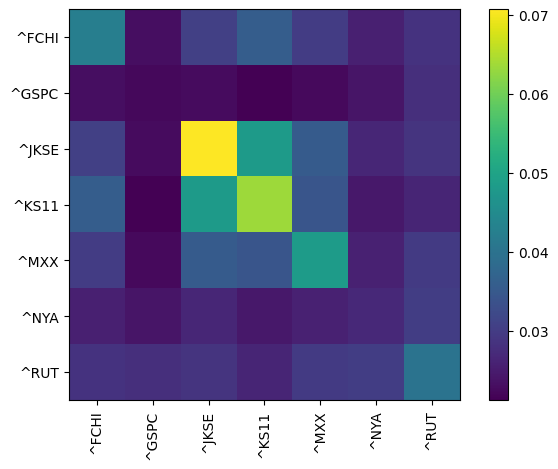

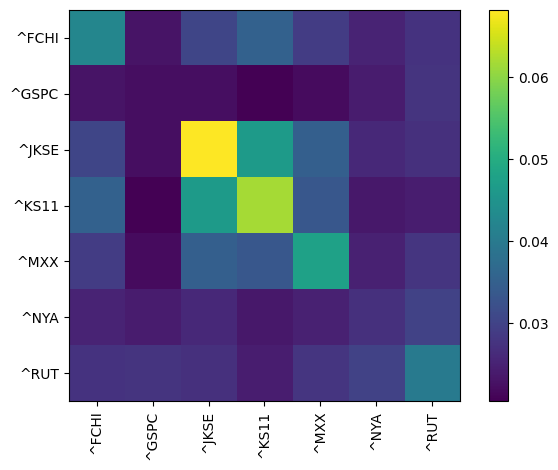

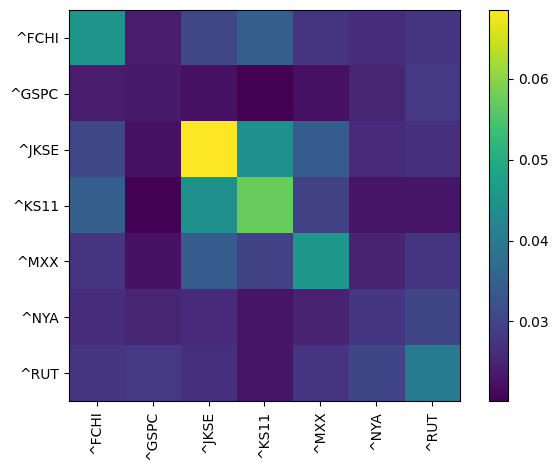

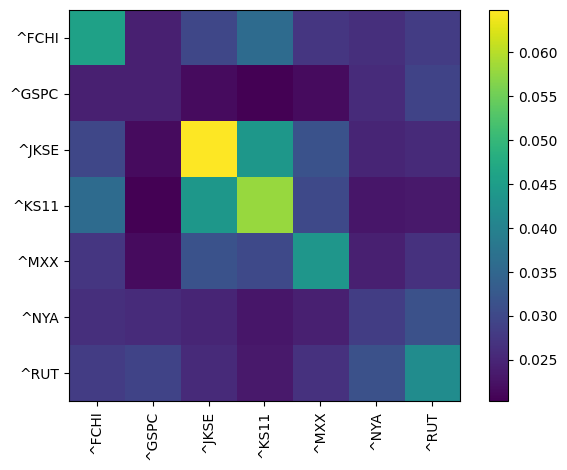

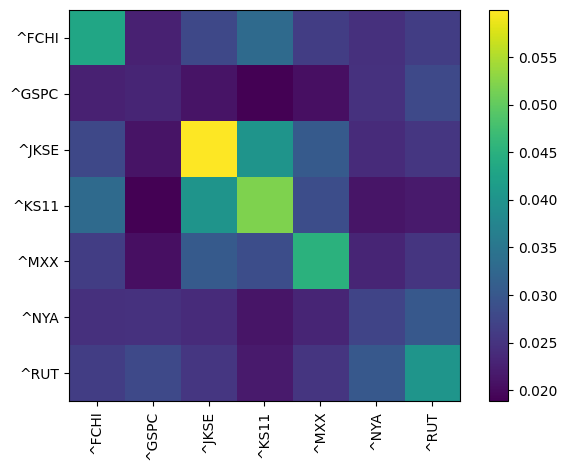

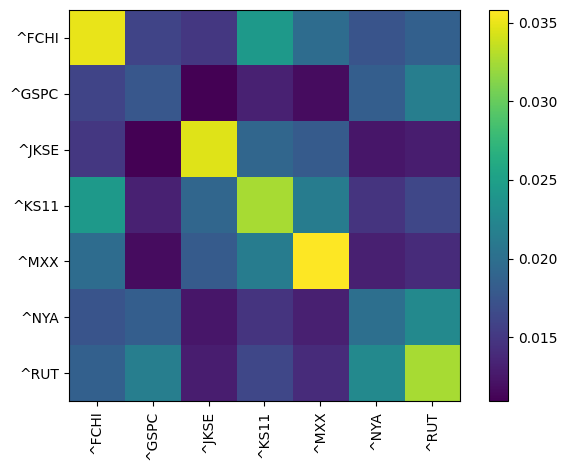

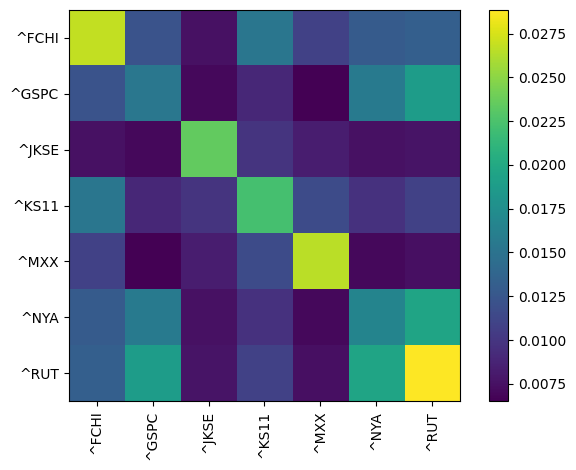

In [7]:
from pypfopt.plotting import plot_covariance
#cov_matrices:
for j in range(11):
    plot_covariance(sliding_windows_data[str(j+1) +'_yearly_cov'])

#### Efficient frontiers

/tmp/ipykernel_40345/1805605546.py:24: RuntimeWarning: invalid value encountered in true_divide
  weights /= np.sum(weights)


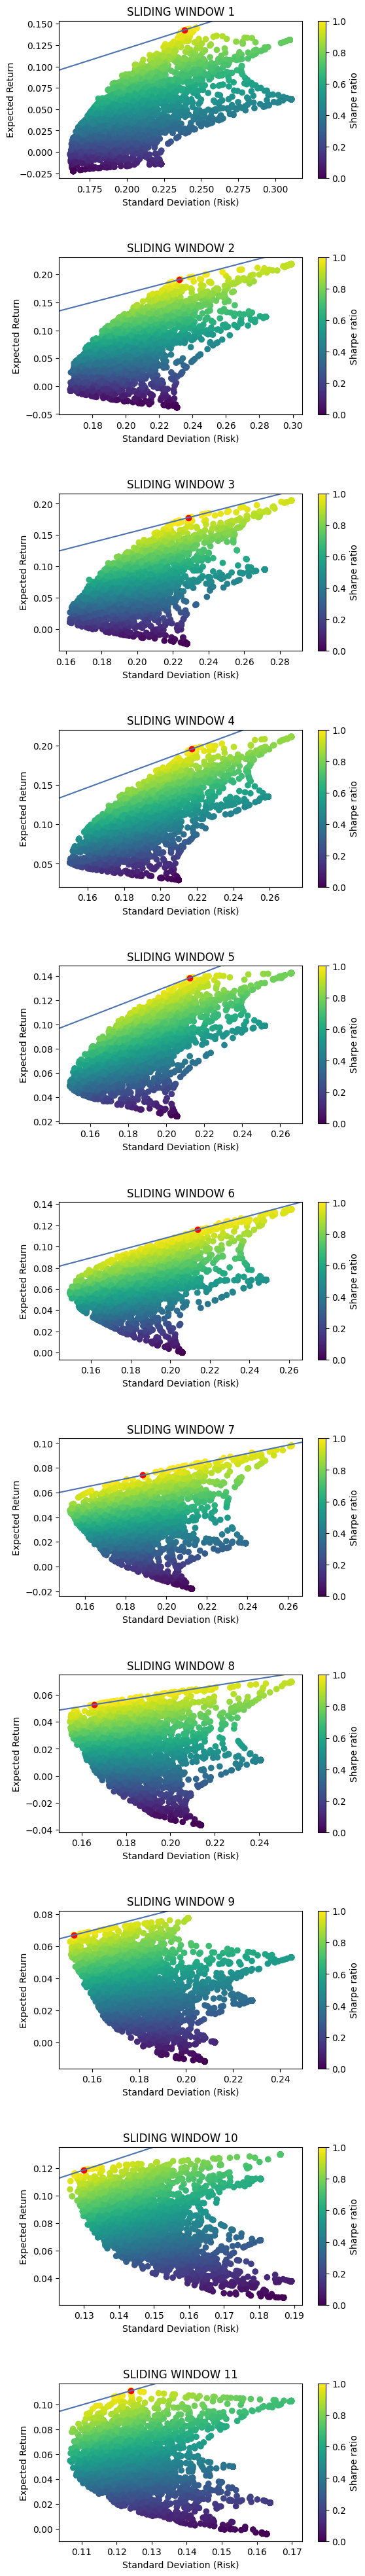

In [8]:
import numpy as np
import matplotlib.pyplot as plt

risk_free_rate = 0.01

 #take a list of lists of frontier returns and variances
f_r = []
f_v = []
sharper = []
#w = [] #append weights for each portfolio
frontiers_portfolios = []
highest_sharper_portfolios = []

for j in range(11):
    returns = sliding_windows_data[str(j+1) +'_yearly_mean']
    covariances = sliding_windows_data[str(j+1) +'_yearly_cov']

    frontier_mean_returns = []
    frontier_stds = []
    w = []
    for i in range(3000):
        weights = np.random.normal(0, 1, size=7) #use normal distribution
        weights = [x if x >= 0 else 0 for x in weights]  
        weights /= np.sum(weights)
        if np.isnan(weights).any():
            continue
        portfolio_return = np.sum(returns * weights)
        portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariances, weights)))
        frontier_mean_returns.append(portfolio_return)
        frontier_stds.append(portfolio_std)
        w.append(weights)
    frontiers_portfolios.append(w)
    f_r.append(frontier_mean_returns)
    f_v.append(frontier_stds)

    # highest sharper portfolio
    sharper.append(np.array(frontier_mean_returns) / np.array(frontier_stds))
    index = sharper[-1].argmax(axis=0)
    highest_sharper_portfolios.append({
        "dates": sliding_windows_data[str(j+1) +'_dates'],
        "return": frontier_mean_returns[index],
        "std": frontier_stds[index],
        "weights": frontiers_portfolios[j][index]})
    #print(highest_sharper_portfolios[-1]["return"])
    #print(sum(sliding_windows_data[str(j+1) +'_yearly_mean']*highest_sharper_portfolios[-1]["weights"]))

    

    
# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    im = axs[i].scatter(f_v[i], f_r[i], c=sharper[i])
    im = axs[i].scatter(highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"], c="red")
    # plotting capital market line (tobin separation)
    # equivalent to 
    #axs[i].axline((0, risk_free_rate), (highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"]))
    # but prettier
    axs[i].axline(
        (min(f_v[i]), (min(f_v[i])/highest_sharper_portfolios[i]["std"])*(highest_sharper_portfolios[i]["return"]-risk_free_rate)+risk_free_rate),
        (highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"]))
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    plt.colorbar(im, ax=axs[i], label = 'Sharpe ratio')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()



In [9]:
# Asset Allocation (uncomment last line to prove that code works)
# I'm calculating optimal asset allocation and turnover for each time window. Maybe we're supposed to do it for each year idk

# required rate of return
rrr = 0.05

# optimal asset allocation:
# mix of max sharpe ratio portfolio and risk free rate that reaches RRR

for i, portfolio in enumerate(highest_sharper_portfolios):

    risk_free_rate_portion = (rrr - portfolio["return"]) / (risk_free_rate - portfolio["return"])
    # make sure it's between 0 and 1
    risk_free_rate_portion = 1 if risk_free_rate_portion>1 else 0 if risk_free_rate_portion<0 else risk_free_rate_portion

    highest_sharper_portfolios[i]["risk_free_rate_portion"] = risk_free_rate_portion
    highest_sharper_portfolios[i]["weights_incl_rf"] = np.append(portfolio["weights"]*(1-risk_free_rate_portion), risk_free_rate_portion)

    print(f"""{round(risk_free_rate_portion*100)}% of the portfolio in window {str(i+1)} should be risk free at {risk_free_rate*100}%, the remaining {round((1-risk_free_rate_portion)*100)}% have a return of {round(portfolio["return"]*100)}%""")
    
    # check if calculation was correct
    # print(f"The total return of the portfolio is {round((risk_free_rate_portion*risk_free_rate + (1-risk_free_rate_portion)*portfolio['return'])*100, 1)}%")


70% of the portfolio in window 1 should be risk free at 1.0%, the remaining 30% have a return of 14%
78% of the portfolio in window 2 should be risk free at 1.0%, the remaining 22% have a return of 19%
76% of the portfolio in window 3 should be risk free at 1.0%, the remaining 24% have a return of 18%
78% of the portfolio in window 4 should be risk free at 1.0%, the remaining 22% have a return of 20%
69% of the portfolio in window 5 should be risk free at 1.0%, the remaining 31% have a return of 14%
62% of the portfolio in window 6 should be risk free at 1.0%, the remaining 38% have a return of 12%
37% of the portfolio in window 7 should be risk free at 1.0%, the remaining 63% have a return of 7%
7% of the portfolio in window 8 should be risk free at 1.0%, the remaining 93% have a return of 5%
30% of the portfolio in window 9 should be risk free at 1.0%, the remaining 70% have a return of 7%
63% of the portfolio in window 10 should be risk free at 1.0%, the remaining 37% have a return 

In [12]:
# turnover
# For turnover I'm considering all assets, not just risk free. Not sure if it's correct.
for i, (portfolio, previous_portfolio) in enumerate(zip(highest_sharper_portfolios[1:], highest_sharper_portfolios)):
    
    # parts of the portfolio that remain the same from the previous portfolio
    unchanged_assets = [min(weight_pair) for weight_pair in zip(portfolio["weights_incl_rf"], previous_portfolio["weights_incl_rf"])]
    turnover_rate = 1-sum(unchanged_assets)
    print(f"turnover rate from sliding window {i+1} to {i+2} is {round(turnover_rate*100)}%")


turnover rate from sliding window 1 to 2 is 13%
turnover rate from sliding window 2 to 3 is 2%
turnover rate from sliding window 3 to 4 is 4%
turnover rate from sliding window 4 to 5 is 10%
turnover rate from sliding window 5 to 6 is 13%
turnover rate from sliding window 6 to 7 is 40%
turnover rate from sliding window 7 to 8 is 33%
turnover rate from sliding window 8 to 9 is 31%
turnover rate from sliding window 9 to 10 is 47%
turnover rate from sliding window 10 to 11 is 16%


In [15]:
# Backtest (uncomment returns line and change the 12 to 119 to prove the code works (you should get aprox. 10x rrr))

for i, portfolio in enumerate(highest_sharper_portfolios[:-1]):
    
    # print year
    print(f"Year: {portfolio['dates'][1].year}")

    weights = portfolio["weights_incl_rf"]

    # connect symbol of each asset to weight the asset has in the portfolio
    symbol_weight_pairs = zip(list(data.columns)+["risk free asset"], weights)
    # remove weights that are 0
    symbol_weight_pairs = [pair for pair in symbol_weight_pairs if pair[1]]
    # print symbol weight pairs
    print(f"Weights: {', '.join( [str(round(weight*100))+'% '+symbol for symbol, weight in symbol_weight_pairs] )}")

    # return from the year that starts immediately after the sliding window
    returns = (data / data.shift(1))[i*12+120:i*12+120+12]
    #returns = (data / data.shift(1))[1+i*12:12*10+i*12] # uncomment this
    logReturn = np.log(returns)
    # add column for risk free asset
    logReturn["rf"] = [risk_free_rate/12]*12 # change last 12 to 119
    logReturn_yearly = logReturn.sum()
    # total weighted return for the year
    weighted_return = (logReturn_yearly*weights).sum()
    print(f"Return: {str(round(weighted_return*100))}%")
    
    covariances = 12 * logReturn.cov()
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariances, weights)))

    print(f"Standard deviation: " + str(round(portfolio_std,4)))
    

Year: 2010
Weights: 5% ^JKSE, 25% ^MXX, 70% risk free asset
Return: 8%
Standard deviation: 0.0498
Year: 2011
Weights: 10% ^JKSE, 12% ^MXX, 78% risk free asset
Return: -1%
Standard deviation: 0.0303
Year: 2012
Weights: 12% ^JKSE, 12% ^MXX, 76% risk free asset
Return: 4%
Standard deviation: 0.0331
Year: 2013
Weights: 8% ^JKSE, 14% ^MXX, 78% risk free asset
Return: -1%
Standard deviation: 0.0245
Year: 2014
Weights: 10% ^JKSE, 21% ^MXX, 69% risk free asset
Return: 1%
Standard deviation: 0.0332
Year: 2015
Weights: 2% ^GSPC, 21% ^JKSE, 15% ^MXX, 62% risk free asset
Return: -7%
Standard deviation: 0.0525
Year: 2016
Weights: 29% ^GSPC, 33% ^JKSE, 37% risk free asset
Return: 8%
Standard deviation: 0.052
Year: 2017
Weights: 63% ^GSPC, 31% ^JKSE, 7% risk free asset
Return: 17%
Standard deviation: 0.0279
Year: 2018
Weights: 70% ^GSPC, 30% risk free asset
Return: -4%
Standard deviation: 0.11
Year: 2019
Weights: 23% ^GSPC, 14% ^JKSE, 63% risk free asset
Return: 7%
Standard deviation: 0.0408


In [ ]:
#The results might change between runs because the points are computed at random

In [ ]:
for i in range(len(f_r)):
    print("Highest return portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(f_r[i])])
    print("__________________________________________")

In [ ]:
# Less risky portfolio
for i in range(len(f_r)):
    print("Lowest risk portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmin(f_v[i])])
    print("__________________________________________")

In [ ]:
#Highest sharpe ratio

for i in range(11):
    SharpeR = np.array(f_r[i]) / np.array(f_v[i])
    print("Highest Sharpe-ratio portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(SharpeR)])
    print("__________________________________________")

# Let's try to replicate the previous efficient frontiers with a library

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
from pypfopt import EfficientFrontier
from pypfopt import plotting

# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()

### The results are the same, we can use the library to use compute the efficient frontier with risk free rate 1

## Efficient frontier risk free rate

In [ ]:
Rf = 0.01


fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    #need to create another instance
    ef2 = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    Best_portfolio = ef2.max_sharpe(risk_free_rate=0) #best portfolio weights
    stats = ef2.portfolio_performance(verbose=False, risk_free_rate=0)
    Rp = stats[0]
    sigma = stats[1]
    
    xs = np.linspace(0, 2)
    sigma_c = xs * sigma # slide 22 ch05
    Rc = Rf + (Rp - Rf)/sigma * sigma_c
    
    
    opt = axs[i].scatter(sigma, Rp, marker = '*', c = 'red', s=100, label = 'optimal portfolio')#best performance portfolio
    line1, = axs[i].plot(sigma_c, Rc, "-", color="k", linewidth=0.8, label = 'lending and borrowing')
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    axs[i].legend()
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()
